# preprocessing

In [318]:
library(datasets)
library(NbClust)
library(factoextra)
library(tidyverse)
library(janitor)
library(readxl) # read xls files
library(NbClust) # find
library(knitr) # find best no cluster
library(factoextra)
library(cluster)
library("factoextra")
library(caret)

In [218]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [219]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

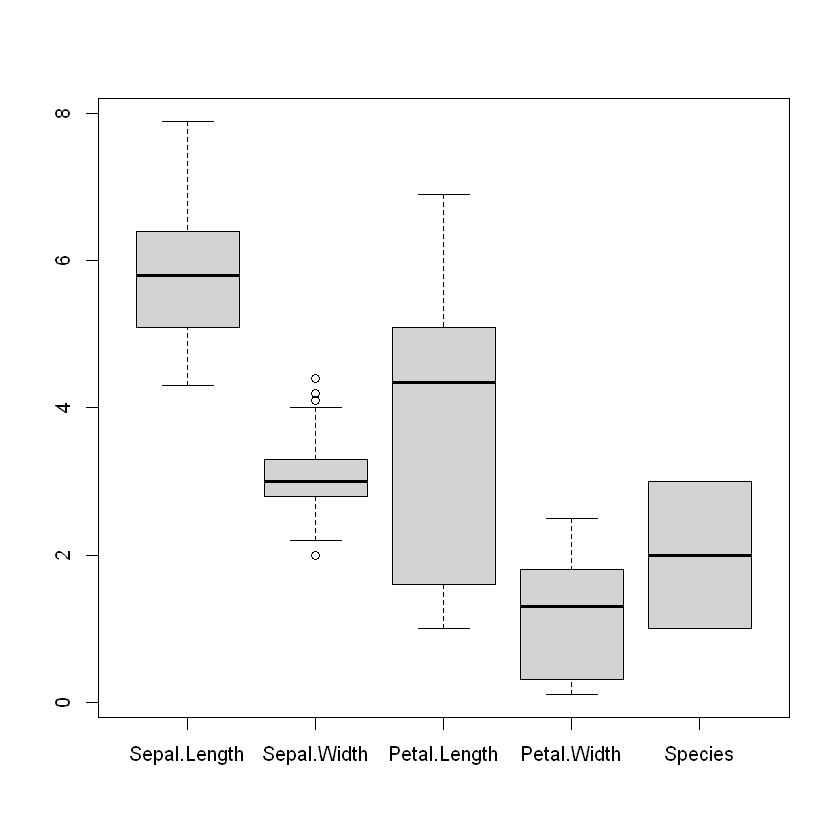

In [220]:
boxplot(iris)

## remove outliares

### IQR

In [221]:
#find Q1, Q3, and interquartile range for values in column A
Q1 <- quantile(iris$Sepal.Width, .25)
Q3 <- quantile(iris$Sepal.Width, .75)
IQR <- IQR(iris$Sepal.Width)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
no_outliers <- subset(iris, iris$Sepal.Width> (Q1 - 1.5*IQR) & iris$Sepal.Width< (Q3 + 1.5*IQR))

#view row and column count of new data frame
dim(no_outliers)

[1] 146   5

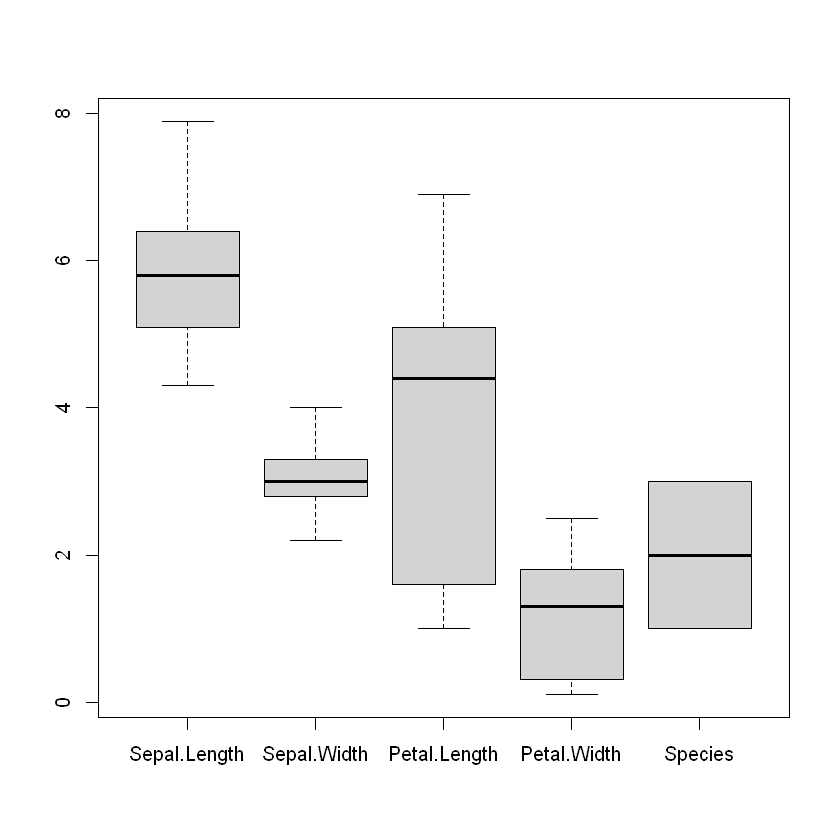

In [222]:
boxplot(no_outliers)

## Normalization

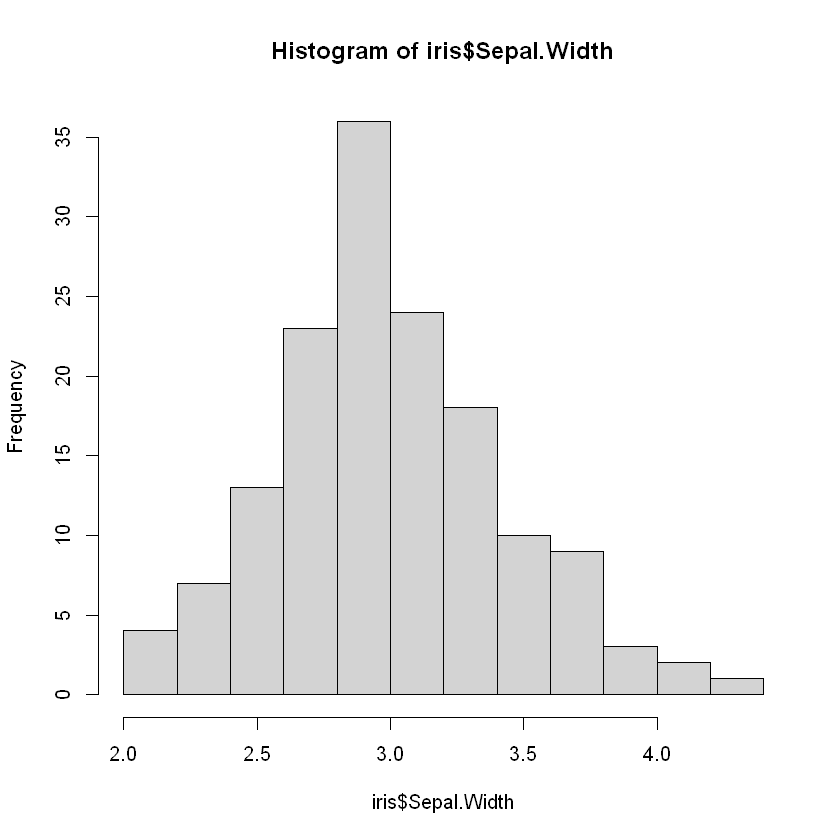

In [223]:
hist(iris$Sepal.Width)

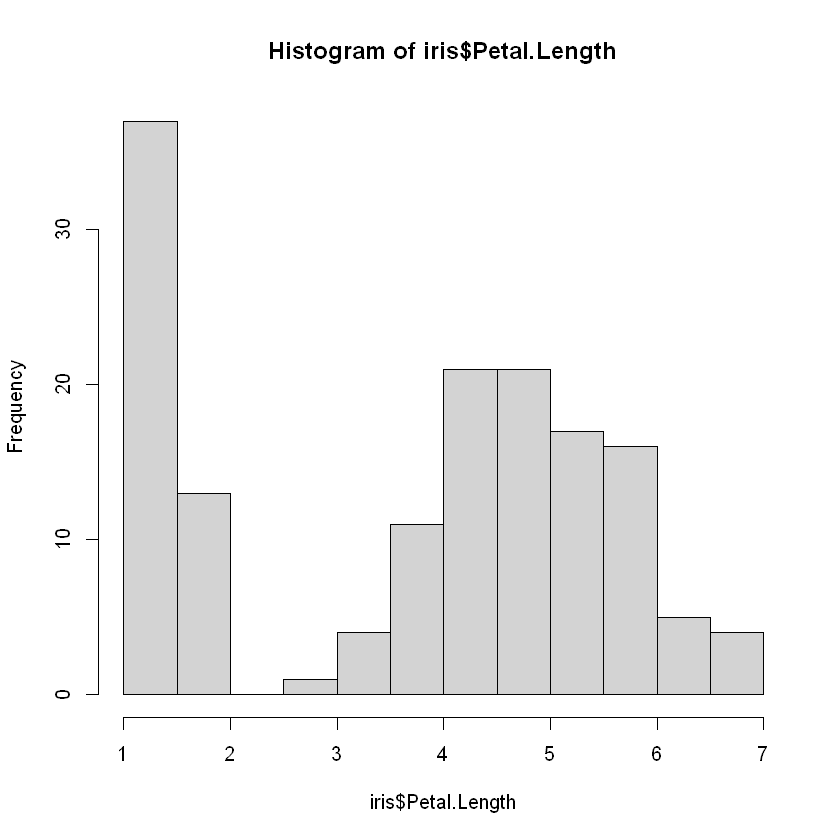

In [224]:
hist(iris$Petal.Length)

In [225]:
z = function(x) {
  return((x - mean(x)) / sd(x))
}

In [226]:
dfNorm <- as.data.frame(lapply(no_outliers[1:4], z_score))

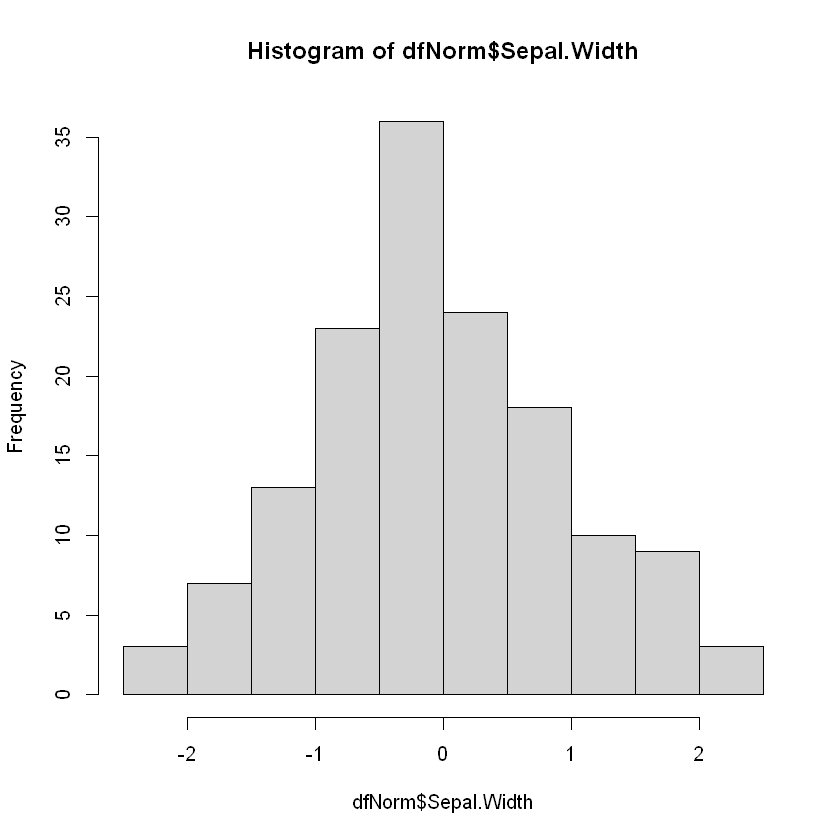

In [227]:
hist(dfNorm$Sepal.Width)

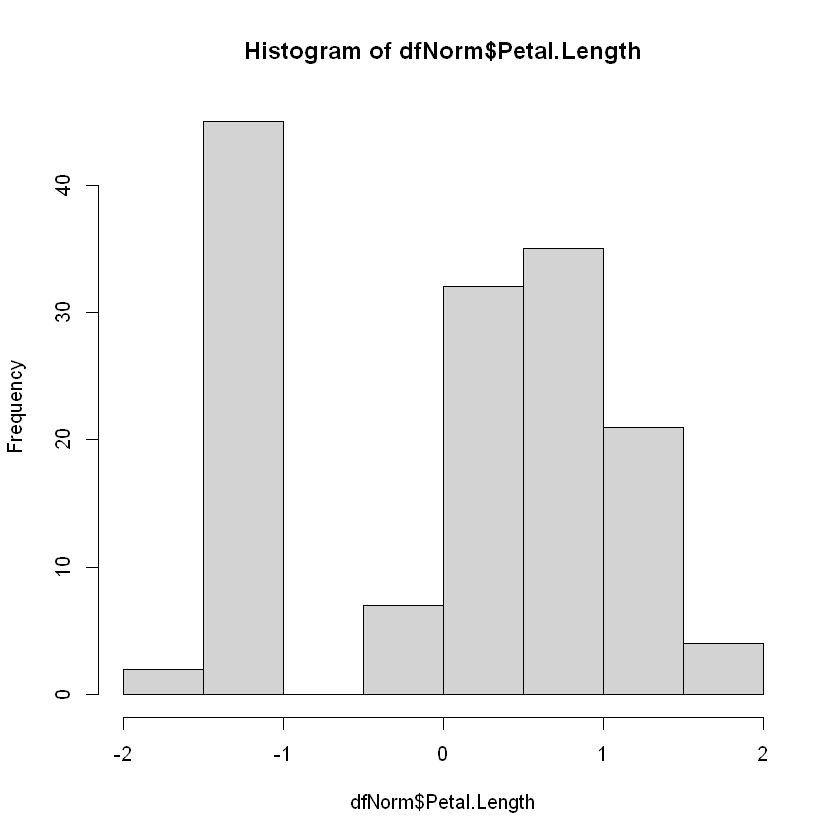

In [228]:
hist(dfNorm$Petal.Length)

In [229]:
summary(dfNorm)

  Sepal.Length       Sepal.Width       Petal.Length      Petal.Width     
 Min.   :-1.86652   Min.   :-2.1124   Min.   :-1.5966   Min.   :-1.4756  
 1st Qu.:-0.90739   1st Qu.:-0.6043   1st Qu.:-1.2553   1st Qu.:-1.2122  
 Median :-0.06816   Median :-0.1016   Median : 0.3374   Median : 0.1046  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.65119   3rd Qu.: 0.6525   3rd Qu.: 0.7356   3rd Qu.: 0.7630  
 Max.   : 2.44955   Max.   : 2.4119   Max.   : 1.7594   Max.   : 1.6848  

In [230]:
head(dfNorm)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.9073918,1.1551740,-1.369051,-1.343899
2,-1.1471732,-0.1015727,-1.369051,-1.343899
3,-1.3869546,0.4011260,-1.425933,-1.343899
4,-1.5068453,0.1497767,-1.312170,-1.343899
5,-1.0272825,1.4065234,-1.369051,-1.343899
6,-0.5477198,2.1605714,-1.198407,-1.080531


In [231]:
dfNorm$Species <- no_outliers$Species

In [232]:
head(dfNorm)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-0.9073918,1.1551740,-1.369051,-1.343899,setosa
2,-1.1471732,-0.1015727,-1.369051,-1.343899,setosa
3,-1.3869546,0.4011260,-1.425933,-1.343899,setosa
4,-1.5068453,0.1497767,-1.312170,-1.343899,setosa
5,-1.0272825,1.4065234,-1.369051,-1.343899,setosa
6,-0.5477198,2.1605714,-1.198407,-1.080531,setosa


Clustering automated tools

### nb

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


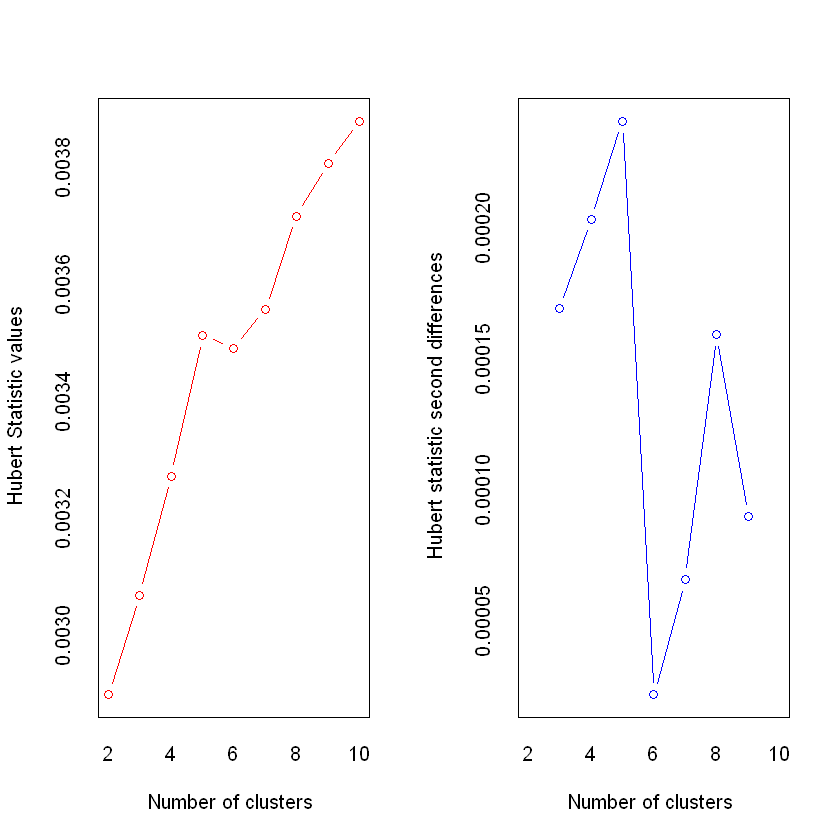

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 11 proposed 2 as the best number of clusters 
* 11 proposed 3 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


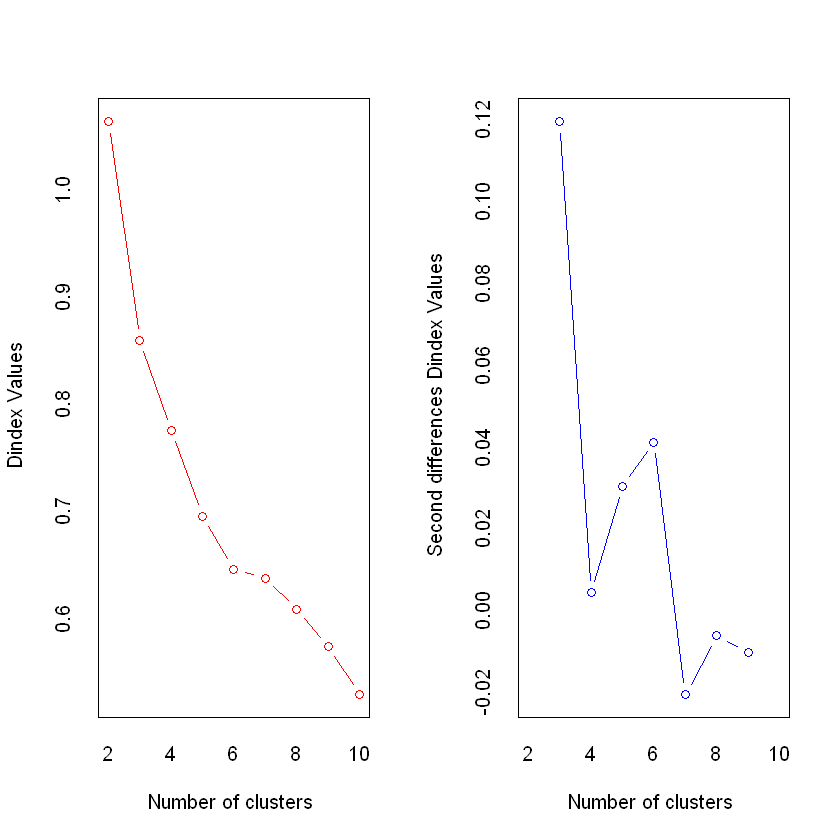

In [233]:
set.seed(26)
clusterNo=NbClust(dfNorm[1:4],distance="euclidean", min.nc=2,max.nc=10,method="kmeans",index="all")

## elbow

In [234]:
k = 2:10
set.seed(42)	
WSS = sapply(k, function(k) {kmeans(dfNorm[1:4], centers=k)$tot.withinss})

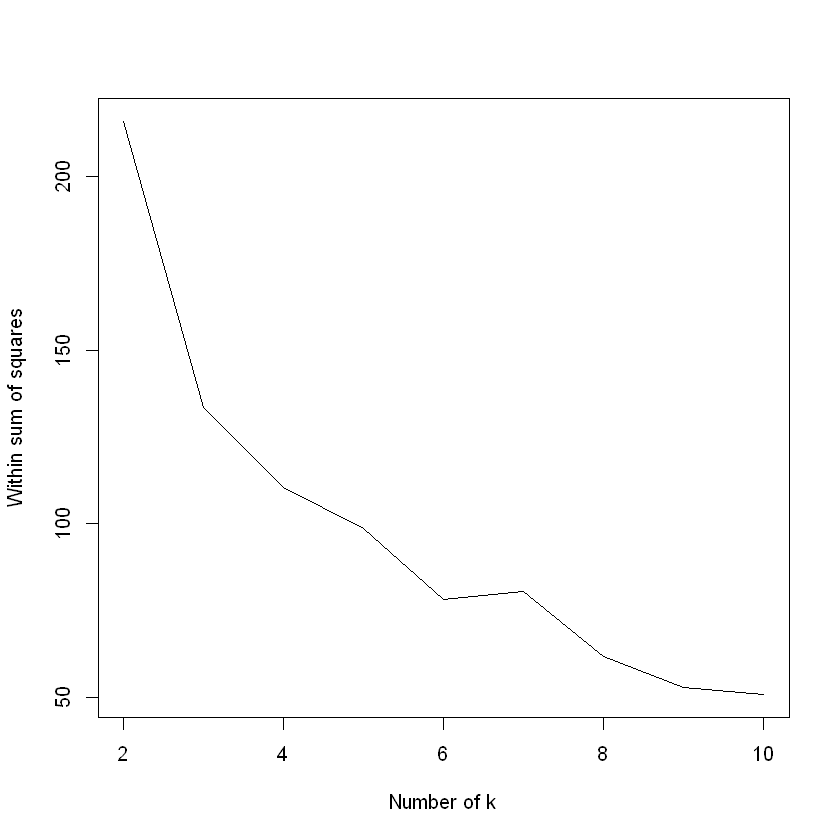

In [235]:
plot(k, WSS, type="l", xlab= "Number of k", ylab="Within sum of squares")

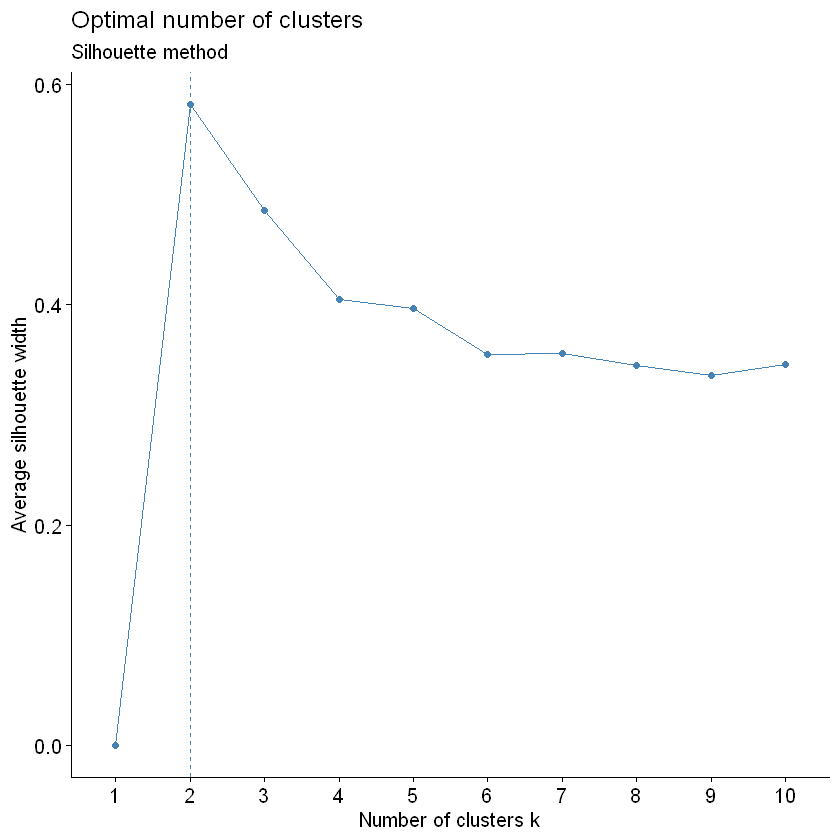

In [236]:
# Silhoutte method
fviz_nbclust(dfNorm[1:4], kmeans, method = "silhouette") +
 labs(subtitle = "Silhouette method")

## kmeans

In [278]:
x = dfNorm[1:4]
y=dfNorm$Species 

In [279]:
kc <- kmeans(x,4)

In [280]:
kc

K-means clustering with 4 clusters of sizes 54, 17, 30, 45

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1  -0.01487228 -0.89751226    0.3542466   0.2850816
2  -1.40105937 -0.01286115   -1.3690512  -1.3516450
3  -0.85943556  1.33111857   -1.3140657  -1.2429411
4   1.12009288  0.19446099    0.9681450   0.9971509

Clustering vector:
  [1] 3 2 2 2 3 3 3 3 2 2 3 3 2 2 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 2 3 2 2 3 3 2 3
 [38] 3 2 2 3 3 2 3 2 3 3 4 4 4 1 1 1 4 1 1 1 1 1 1 1 4 1 1 1 1 4 1 1 1 1 4 4 4
 [75] 1 1 1 1 1 1 1 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 4 4 4 4 1 4 1 4 4 1 4 1 1
[112] 4 4 4 4 1 4 1 4 1 4 4 1 4 4 4 4 4 4 1 1 4 4 4 1 4 4 4 1 4 4 4 1 4 4 1

Within cluster sum of squares by cluster:
[1] 46.421056  5.905762 11.192925 46.963169
 (between_SS / total_SS =  81.0 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [281]:
table(y,kc$cluster)

            
y             1  2  3  4
  setosa      0 17 30  0
  versicolor 38  0  0 11
  virginica  16  0  0 34

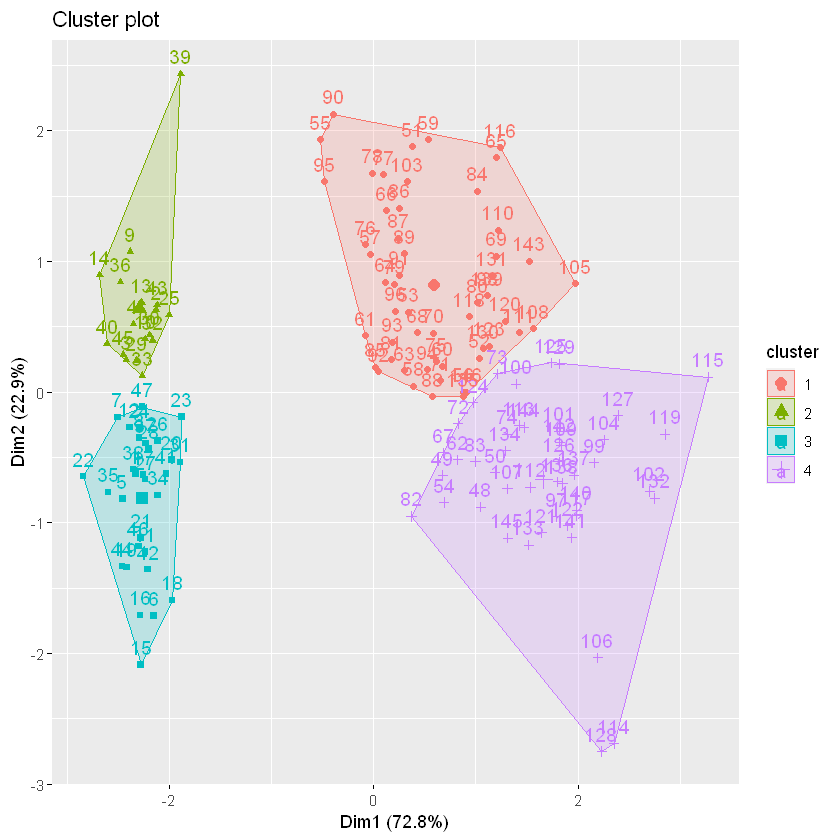

In [282]:
fviz_cluster(kc,data=dfNorm[1:4])

In [319]:
# implement the metrix
confusionMatrix(

 factor(kc$cluster, levels = 1:4),

 factor(as.numeric(dfNorm$Species), levels = 1:4)
)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4
         1  0 38 16  0
         2 17  0  0  0
         3 30  0  0  0
         4  0 11 34  0

Overall Statistics
                                     
               Accuracy : 0          
                 95% CI : (0, 0.0249)
    No Information Rate : 0.3425     
    P-Value [Acc > NIR] : 1          
                                     
                  Kappa : -0.2962    
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.0000   0.0000   0.0000       NA
Specificity            0.4545   0.8247   0.6875   0.6918
Pos Pred Value         0.0000   0.0000   0.0000       NA
Neg Pred Value         0.4891   0.6202   0.5690       NA
Prevalence             0.3219   0.3356   0.3425   0.0000
Detection Rate         0.0000   0.0000   0.0000   0.0000
Detection Prevalence   0.3699   0.1164   0.2055 

# PCA

#PCA

In [321]:
head(dfNorm)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-0.9073918,1.1551740,-1.369051,-1.343899,setosa
2,-1.1471732,-0.1015727,-1.369051,-1.343899,setosa
3,-1.3869546,0.4011260,-1.425933,-1.343899,setosa
4,-1.5068453,0.1497767,-1.312170,-1.343899,setosa
5,-1.0272825,1.4065234,-1.369051,-1.343899,setosa
6,-0.5477198,2.1605714,-1.198407,-1.080531,setosa


In [322]:
myPr <- prcomp(dfNorm[1:4])

In [296]:
# myPr <- prcomp(iris[, -5], scale = TRUE)# 

In [324]:
# plot((iris$Sepal.Length - mean(iris$Sepal.Length)) / sd(iris$Sepal.Length))

In [325]:
myPr

Standard deviations (1, .., p=4):
[1] 1.7065558 0.9566034 0.3892507 0.1451242

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5265870 -0.34715157  0.7297076  0.2640429
Sepal.Width  -0.2578415 -0.93442278 -0.2162911 -0.1165762
Petal.Length  0.5808933 -0.02740124 -0.1424080 -0.8009570
Petal.Width   0.5646122 -0.07475979 -0.6328230  0.5245562

In [326]:
summary(myPr)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7066 0.9566 0.38925 0.14512
Proportion of Variance 0.7281 0.2288 0.03788 0.00527
Cumulative Proportion  0.7281 0.9569 0.99473 1.00000

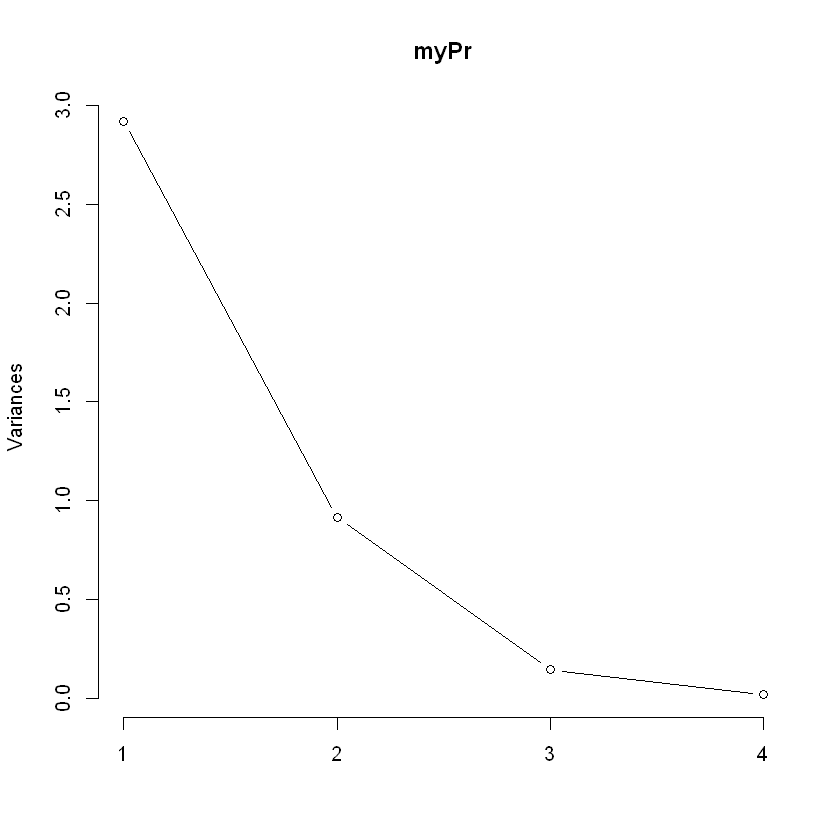

In [302]:
plot(myPr, type = "l")

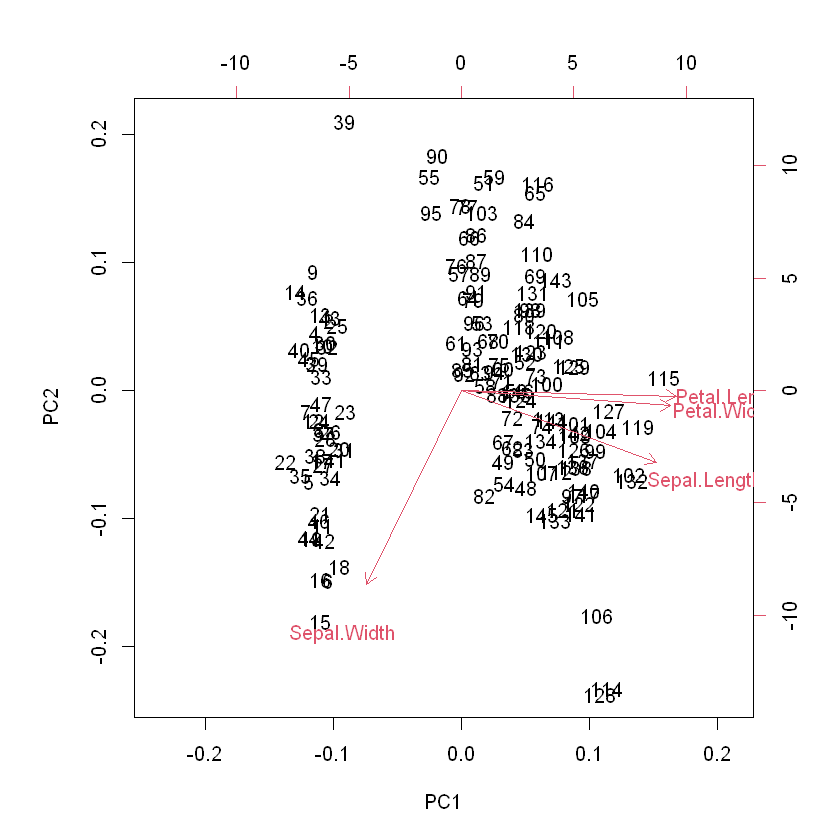

In [327]:
biplot(myPr)

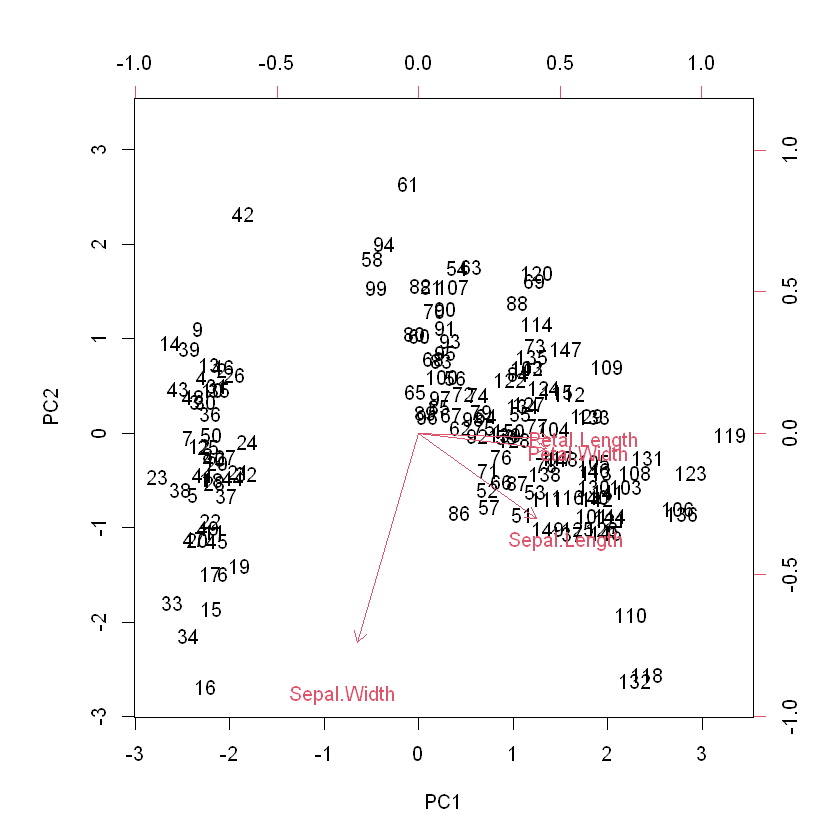

In [304]:
biplot(myPr, scale = 0)

In [305]:
str(myPr)

List of 5
 $ sdev    : num [1:4] 1.708 0.956 0.383 0.144
 $ rotation: num [1:4, 1:4] 0.521 -0.269 0.58 0.565 -0.377 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 $ center  : Named num [1:4] 5.84 3.06 3.76 1.2
  ..- attr(*, "names")= chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ scale   : Named num [1:4] 0.828 0.436 1.765 0.762
  ..- attr(*, "names")= chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ x       : num [1:150, 1:4] -2.26 -2.07 -2.36 -2.29 -2.38 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 - attr(*, "class")= chr "prcomp"


In [306]:
myPr$x

PC1,PC2,PC3,PC4
-2.257141,-0.47842383,0.127279624,0.024087508
-2.074013,0.67188269,0.233825517,0.102662845
-2.356335,0.34076642,-0.044053900,0.028282305
-2.291707,0.59539986,-0.090985297,-0.065735340
-2.381863,-0.64467566,-0.015685647,-0.035802870
-2.068701,-1.48420530,-0.026878250,0.006586116
-2.435868,-0.04748512,-0.334350297,-0.036652767
-2.225392,-0.22240300,0.088399352,-0.024529919
-2.326845,1.11160370,-0.144592465,-0.026769540
-2.177035,0.46744757,0.252918268,-0.039766068


In [328]:
iris2 <- cbind(dfNorm, myPr$x)

In [329]:
head(iris2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,PC1,PC2,PC3,PC4
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.9073918,1.1551740,-1.369051,-1.343899,setosa,-2.329727,-0.6264351,0.133429316,0.017344502
2,-1.1471732,-0.1015727,-1.369051,-1.343899,setosa,-2.131951,0.6311381,0.230282086,0.100538622
3,-1.3869546,0.4011260,-1.425933,-1.343899,setosa,-2.420876,0.2462041,-0.045317069,0.024182975
4,-1.5068453,0.1497767,-1.312170,-1.343899,setosa,-2.353116,0.5195737,-0.094638354,-0.069291192
5,-1.0272825,1.4065234,-1.369051,-1.343899,setosa,-2.457668,-0.8196814,-0.008420448,-0.043613126
6,-0.5477198,2.1605714,-1.198407,-1.080531,setosa,-2.151734,-1.7151273,-0.012540197,-0.003419447


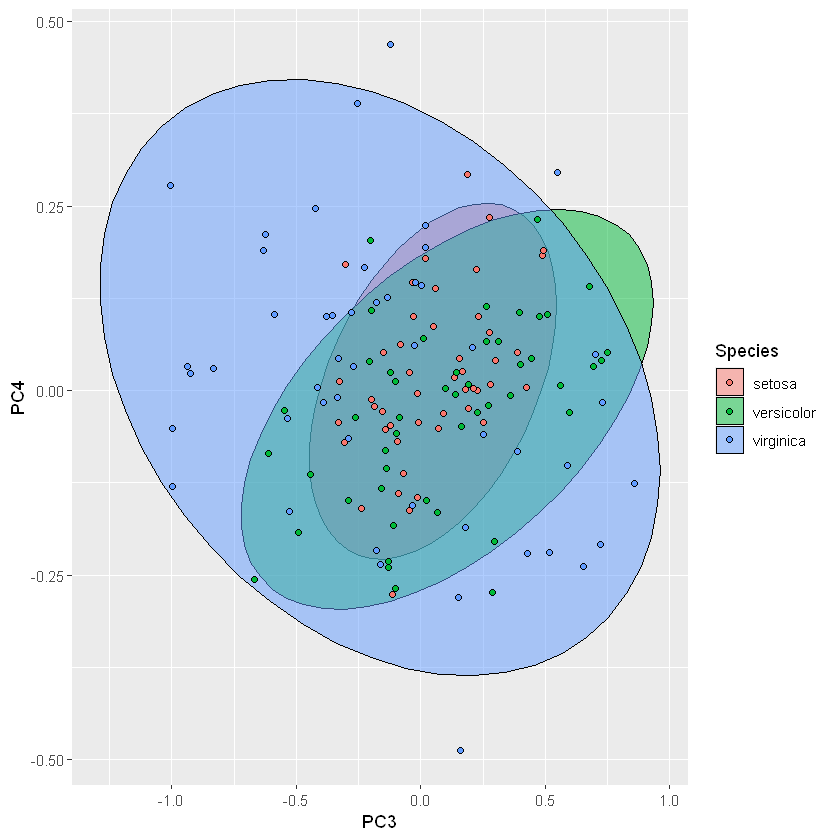

In [333]:
library(ggplot2)

ggplot(iris2, aes(PC3,PC4,col = Species, fill = Species)) +
  stat_ellipse(geom = "polygon", col = "black", alpha = 0.5) +
  geom_point(shape = 21, col = "black")

In [310]:
cor(iris[, -5], iris2[, 6:9])

,PC1,PC2,PC3,PC4
Sepal.Length,0.8901688,-0.36082989,0.27565767,0.03760602
Sepal.Width,-0.4601427,-0.88271627,-0.09361987,-0.01777631
Petal.Length,0.9915552,-0.02341519,-0.05444699,-0.11534978
Petal.Width,0.9649790,-0.06399985,-0.24298265,0.07535950


In [337]:
df_last <- iris2[8:9]

In [339]:
df_last$Species = iris2$Species

In [340]:
head(df_last)

,PC3,PC4,Species
,<dbl>,<dbl>,<fct>
1,0.133429316,0.017344502,setosa
2,0.230282086,0.100538622,setosa
3,-0.045317069,0.024182975,setosa
4,-0.094638354,-0.069291192,setosa
5,-0.008420448,-0.043613126,setosa
6,-0.012540197,-0.003419447,setosa


In [341]:
x = df_last[1:2]
y=df_last$Species 

In [342]:
kc <- kmeans(x,4)

In [343]:
kc

K-means clustering with 4 clusters of sizes 53, 16, 50, 27

Cluster means:
         PC3          PC4
1 -0.2017434 -0.017135930
2 -0.7160129 -0.006886686
3  0.1434622  0.011955476
4  0.5546480  0.015578425

Clustering vector:
  [1] 3 3 1 1 3 3 1 3 1 3 3 1 3 1 4 3 3 4 1 4 1 1 3 1 3 1 3 3 1 3 3 3 3 4 3 1 3
 [38] 3 3 1 1 1 3 1 1 3 3 4 3 4 3 4 1 1 1 4 2 1 4 3 1 4 2 3 4 3 2 3 4 3 4 4 4 3
 [75] 1 3 3 3 3 1 2 1 4 4 1 1 1 3 3 1 1 1 1 3 1 1 2 2 3 1 1 4 2 4 4 1 1 3 3 2 2
[112] 2 1 3 4 3 1 2 4 3 1 4 1 1 1 4 4 4 1 3 3 4 2 1 1 3 1 1 2 1 2 1 3 1 2 2

Within cluster sum of squares by cluster:
[1] 1.8204195 0.9031468 1.5749076 1.0000759
 (between_SS / total_SS =  78.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

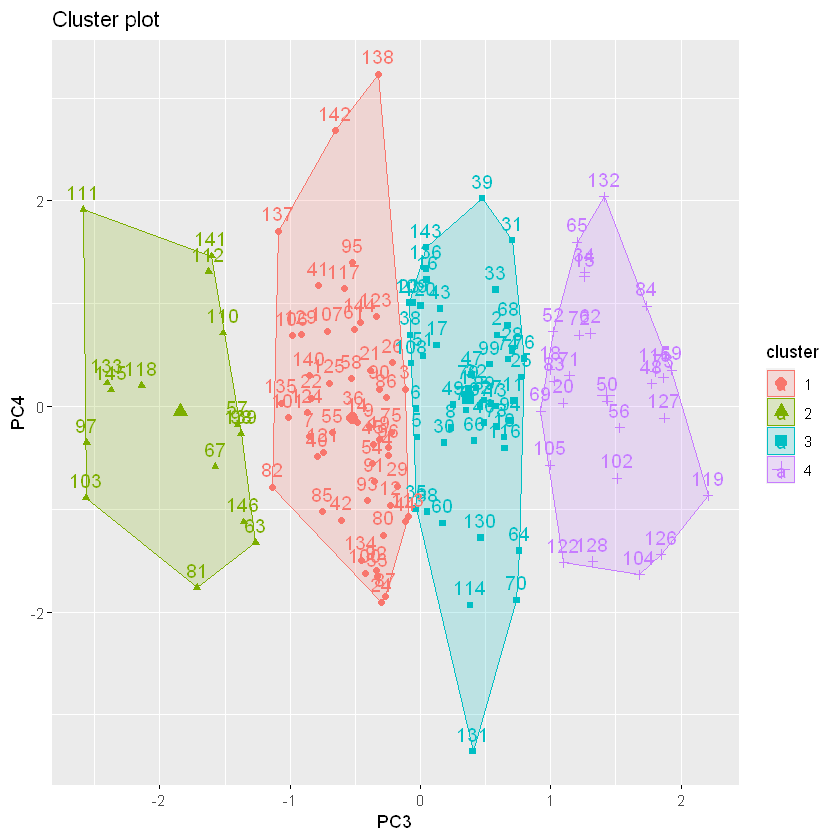

In [344]:
fviz_cluster(kc,data=df_last[1:2])